In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import json
import seaborn as sns
sns.set_style('whitegrid')

In [34]:
num_settings = {\
'x_0' : np.array([1.]),\
'a' : 0.1,\
'b' : 4.9,\
'z_max' : 4.9,\
'mu' : 1.,\
'beta':1,\
'dt' : 0.01,\
}   

n_rep = 100 
k_test = 30
n_sim = 10000


## resampling strategy

method_test = 'keep_survived'
#method_test = 'multinomial'

## GAMS settings
GAMS_type = 'original' 
#GAMS_type = 'rejection' 


info = GAMS_type + method_test +'_n_rep_'+str(n_rep)\
       +'_k_'+str(k_test) + '_n_sim_'+str(n_sim)\
       +'_a_'+str(num_settings['a'])+'_b_'+str(num_settings['b'])\
       +'_beta_'+str(num_settings['beta'])

# read .json file
with open('../py/json/'+info+'.json') as f:
      my_dict = json.load(f)


In [35]:
n_sim = 1000
V_list = my_dict['V_list'][0:n_sim]
E_list = my_dict['E_list'][0:n_sim]

V_mean = np.cumsum(V_list)/np.arange(1,len(V_list)+1)
V_std= [np.std(V_list[0:i]) for i in range(len(V_list))]
V_naive= [np.var(E_list[0:i]) for i in range(len(E_list))]

/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:105: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3146: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)


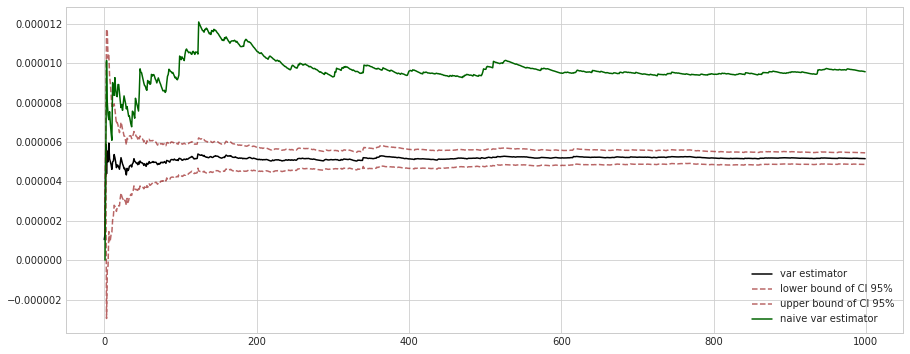

In [36]:
plt.figure(figsize = [15,6])
plt.plot(V_mean, color = 'black', label = 'var estimator')

e = 1.96 *np.array(V_std)
e /= np.sqrt(range(len(V_list)))

plt.plot(V_mean - e, color = 'darkred', alpha = 0.6, label='lower bound of CI 95%',\
        linestyle = '--')
plt.plot(V_mean + e, color = 'darkred', alpha = 0.6, label='upper bound of CI 95%',\
        linestyle = '--')
plt.plot(V_naive, color = 'darkgreen', label='naive var estimator')
plt.legend()

In [37]:
n_sim = 1000
V_list = np.random.exponential(size = 1000) 
E_list =V_list 
V_mean = np.cumsum(V_list)/np.arange(1,len(V_list)+1)
V_std= [np.std(V_list[0:i]) for i in range(len(V_list))]
V_naive= [np.var(E_list[0:i]) for i in range(len(E_list))]


/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:105: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3146: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)


/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


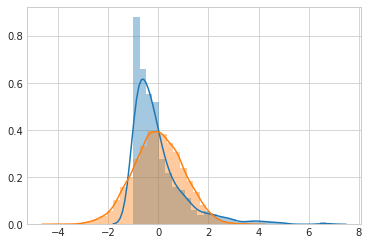

In [33]:
sns.distplot(np.array(E_list)-np.mean(E_list),bins=30)
sns.distplot(np.random.normal(size = 10000),bins=30)


In [29]:
np.divide([2,3],2)

array([ 1. ,  1.5])